In [1]:
import pandas as pd


In [73]:
data = pd.read_csv("/content/full_data.csv")

In [3]:
data.head()

,Settlement,Main_Dmg,f,g
0,Ait Othmane,Possible damage,-8.40655,31.16093
1,Ait Othmane,Damage,-8.40728,31.15985
2,Ait Othmane,Damage,-8.40648,31.16065
3,Ait Othmane,Damage,-8.40631,31.16064
4,Ait Othmane,Possible damage,-8.40649,31.16052


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [55]:
# Encoder les labels
label_encoder = LabelEncoder()
data['Main_Dmg'] = label_encoder.fit_transform(data['Main_Dmg'])


In [56]:

# Diviser le dataset en ensembles d'entraînement et de test
X = data[['f', 'g']].values
y = data['Main_Dmg'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:

# Normaliser les données
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


In [65]:
# Créer le modèle RNN
model = Sequential()
# model.add(LSTM(32, input_shape=(X_train.shape[1], 1)))

# Première couche LSTM avec dropout
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Deuxième couche LSTM avec dropout
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))

# Troisième couche LSTM avec dropout
model.add(LSTM(64))
model.add(Dropout(0.2))

# Couche entièrement connectée (Dense)
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))


model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid'))

In [66]:
# Compiler le modèle
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [67]:

# Adapter le modèle aux données d'entraînement
history=model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=50, batch_size=1, verbose=2)


Epoch 1/50
3843/3843 - 42s - loss: 0.6374 - accuracy: 0.6648 - 42s/epoch - 11ms/step
Epoch 2/50
3843/3843 - 42s - loss: 0.6248 - accuracy: 0.6745 - 42s/epoch - 11ms/step
Epoch 3/50
3843/3843 - 36s - loss: 0.6194 - accuracy: 0.6805 - 36s/epoch - 9ms/step
Epoch 4/50
3843/3843 - 35s - loss: 0.6174 - accuracy: 0.6799 - 35s/epoch - 9ms/step
Epoch 5/50
3843/3843 - 36s - loss: 0.6161 - accuracy: 0.6864 - 36s/epoch - 9ms/step
Epoch 6/50
3843/3843 - 38s - loss: 0.6144 - accuracy: 0.6862 - 38s/epoch - 10ms/step
Epoch 7/50
3843/3843 - 35s - loss: 0.6161 - accuracy: 0.6789 - 35s/epoch - 9ms/step
Epoch 8/50
3843/3843 - 37s - loss: 0.6164 - accuracy: 0.6760 - 37s/epoch - 10ms/step
Epoch 9/50
3843/3843 - 37s - loss: 0.6130 - accuracy: 0.6867 - 37s/epoch - 10ms/step
Epoch 10/50
3843/3843 - 35s - loss: 0.6148 - accuracy: 0.6870 - 35s/epoch - 9ms/step
Epoch 11/50
3843/3843 - 37s - loss: 0.6151 - accuracy: 0.6836 - 37s/epoch - 10ms/step
Epoch 12/50
3843/3843 - 36s - loss: 0.6139 - accuracy: 0.6828 - 36s/

In [68]:
# Évaluer le modèle sur les données de test
loss, accuracy = model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


31/31 [==============================] - 2s 9ms/step - loss: 0.5847 - accuracy: 0.6826
Accuracy: 68.26%


In [69]:
import matplotlib.pyplot as pyplot

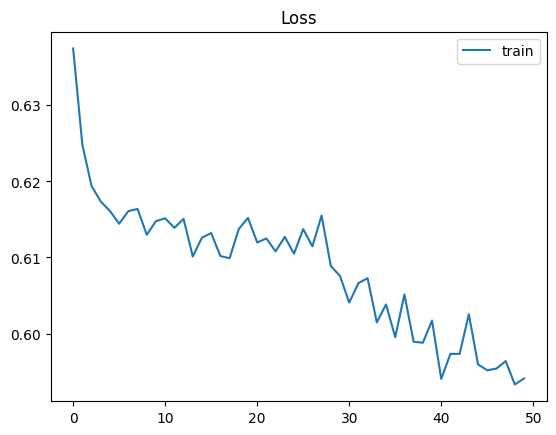

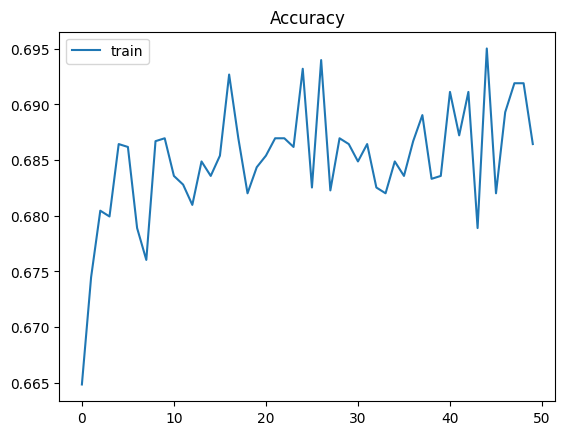

In [70]:
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
#pyplot.plot(hist.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
#pyplot.plot(hist.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.show()

In [71]:

# Sauvegarder le modèle au format HDF5
model.save('model3.h5')

# Charger le modèle à partir du fichier
# loaded_model = load_model('model.h5')

In [80]:
from sklearn.metrics import jaccard_score

# Calculer l'index de similarité Jaccard
jaccard_index = jaccard_score(data['Main_Dmg'], y_kmeans)

print(f'Jaccard Index: {jaccard_index:.2f}')

Jaccard Index: 0.24


In [88]:
from sklearn.metrics import accuracy_score, recall_score, f1_score


In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv("/content/full_data.csv")
# Encoder les labels
label_encoder = LabelEncoder()
data['Main_Dmg'] = label_encoder.fit_transform(data['Main_Dmg'])

# Diviser le dataset en ensembles d'entraînement et de test
X = data[['f', 'g']].values
y = data['Main_Dmg'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy * 100:.2f}%')
# print('\nConfusion Matrix:')
# print(conf_matrix)
# print('\nClassification Report:')
# print(classification_rep)
# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision (Accuracy): {:.2f}%".format(accuracy * 100))

# Calcul du rappel
recall = recall_score(y_test, y_pred, average='binary')  # Utilisez 'micro', 'macro', ou 'weighted' si vous avez une classification multiclasse
print("Rappel (Recall): {:.2f}%".format(recall * 100))

# Calcul de la F1-score
f1 = f1_score(y_test, y_pred, average='binary')  # Utilisez 'micro', 'macro', ou 'weighted' si vous avez une classification multiclasse
print("F1-score: {:.2f}%".format(f1 * 100))

Précision (Accuracy): 74.71%
Rappel (Recall): 57.18%
F1-score: 62.09%


In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("/content/full_data.csv")

# Encoder les labels
label_encoder = LabelEncoder()
data['Main_Dmg'] = label_encoder.fit_transform(data['Main_Dmg'])

# Diviser le dataset en ensembles d'entraînement et de test
X = data[['f', 'g']].values
y = data['Main_Dmg'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle SVM
svm_model = SVC(kernel='linear', random_state=42)

# Entraîner le modèle
svm_model.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = svm_model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 67.64%

Confusion Matrix:
[[587  26]
 [285  63]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       613
           1       0.71      0.18      0.29       348

    accuracy                           0.68       961
   macro avg       0.69      0.57      0.54       961
weighted avg       0.69      0.68      0.61       961

